In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
data_train = pd.read_csv('data/train.csv', sep='\t', encoding='utf-8')
data_test = pd.read_csv('data/test.csv', sep='\t', encoding='utf-8')

print("Shape: ", data_train.shape)
data_train.head()

Shape:  (4987, 2)


,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [3]:
# Check duplicate values
data_train.duplicated().sum()

237

In [4]:
data_train[data_train.label == 'label']

,text,label
1615,content,label


In [5]:
data_train = data_train.drop(1615)

In [6]:
data_train[data_train.text.duplicated()]

,text,label
218,Hollywood insiders have revealed to OK! USA th...,1
223,Scoopnest is a web media which finds for you t...,1
340,"IMDb.com, Inc. takes no responsibility for the...",1
365,"Cynthia Ann Crawford (born February 20, 1966) ...",1
463,Scoopnest is a web media which finds for you t...,0
...,...,...
4967,Need help? Contact the CQ Hotline at (800) 678...,0
4970,"IMDb.com, Inc. takes no responsibility for the...",1
4971,The reality of Justin Bieber and Selena Gomez'...,1
4982,The storybook romance of WWE stars John Cena a...,0


In [7]:
data_train.label.value_counts()

label
0    2972
1    2014
Name: count, dtype: int64

In [8]:
inconsistent_idx = data_train[data_train.text.duplicated()].index

In [9]:
data_train = data_train.drop(inconsistent_idx)

In [10]:
data_train.label.value_counts()

label
0    2869
1    1860
Name: count, dtype: int64

In [11]:
# Data preprocessing

# Convert labels to int
data_train.label = data_train.label.astype(int)
# Split the data
real_news = data_train[data_train.label == 0]
fake_news = data_train[data_train.label == 1]

In [12]:
# Split each sentence into their individuals words and store them in a list
from collections import Counter
agg_fake = " ".join(fake_news["text"]).split()
agg_real = " ".join(real_news["text"]).split()

In [13]:
fake = Counter(agg_fake)
real = Counter(agg_real)

In [14]:
fake.most_common(30)

[('the', 49500),
 ('and', 29271),
 ('to', 28177),
 ('a', 24816),
 ('of', 23118),
 ('in', 20724),
 ('that', 11782),
 ('for', 10893),
 ('on', 10618),
 ('her', 10592),
 ('was', 10473),
 ('with', 10011),
 ('is', 9512),
 ('The', 8421),
 ('she', 7112),
 ('as', 6434),
 ('at', 5839),
 ('his', 5809),
 ('I', 5655),
 ('he', 5126),
 ('has', 4781),
 ('by', 4619),
 ('it', 4504),
 ('have', 4371),
 ('be', 4355),
 ('from', 4195),
 ('an', 3960),
 ('their', 3836),
 ('about', 3491),
 ('not', 3425)]

In [15]:
real.most_common(30)

[('the', 80379),
 ('to', 47455),
 ('and', 46729),
 ('a', 38956),
 ('of', 38537),
 ('in', 32701),
 ('that', 21115),
 ('on', 17472),
 ('for', 17202),
 ('was', 15725),
 ('with', 15102),
 ('is', 14451),
 ('I', 12969),
 ('her', 12891),
 ('The', 12361),
 ('as', 9911),
 ('at', 9467),
 ('she', 9190),
 ('have', 8253),
 ('his', 8054),
 ('it', 8013),
 ('he', 7784),
 ('be', 7554),
 ('you', 6814),
 ('from', 6663),
 ('by', 6648),
 ('this', 6059),
 ('has', 6051),
 ('not', 5835),
 ('an', 5818)]

In [16]:
# Remove stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Disable ssl before downloading

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
sw = nltk.corpus.stopwords.words('english')

In [19]:
len(nltk.corpus.stopwords.words('english'))

179

In [20]:
# calculate baselise stats
print("% fake :", data_train["label"].mean())
print("% real :",1 - data_train["label"].mean())

% fake : 0.39331782617889616
% real : 0.6066821738211039


In [21]:
# feature engineering

In [22]:
# removing stopwords
from nltk.tokenize import RegexpTokenizer
def tokenizer(data):
    tk = RegexpTokenizer('\s+', gaps = True)
    text_data = [] # List for storing the tokenized data
    for values in data.text:
        tokenized_data = tk.tokenize(values) # Tokenize the news
        text_data.append(tokenized_data) # append the tokenized data
    return text_data

In [23]:
sample = data_train.iloc[0:5]

In [24]:
sample

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [25]:
token_samples = tokenizer(sample)

In [26]:
print("Sample text")
print("\n")

sample.text.iloc[0]

Sample text




'Get the latest from TODAY Sign up for our newsletter  No one ever truly gets over losing a loved one, and Blake Shelton is no exception. He was just 14 when his older brother Richie died on Nov. 13, 1990. And, as Shelton noted in a tweet Monday, "It changed my life forever."  Richie was 24 when he died in a car accident in the Sheltons\' home state of Oklahoma. Two years ago, Shelton sent out a message for the 25th anniversary of his loss:  Richie, who was Blake\'s half-brother (they shared a mother), was a passenger in a car that collided with a school bus in Ada, south of Oklahoma City.  Richie, driver Redena McManus and a 3-year-old boy, Christopher McManus, all died during or shortly after the collision, while the bus driver and passengers were uninjured, according to police reports.  The accident has clearly remained with Blake, who told 60 Minutes in 2014, "I remember picking up the phone to call him a week after he was dead, to tell him something. I was picking up the phone to 

In [27]:
print('Tokenized text')
print('\n')
print(token_samples[0])

Tokenized text


['Get', 'the', 'latest', 'from', 'TODAY', 'Sign', 'up', 'for', 'our', 'newsletter', 'No', 'one', 'ever', 'truly', 'gets', 'over', 'losing', 'a', 'loved', 'one,', 'and', 'Blake', 'Shelton', 'is', 'no', 'exception.', 'He', 'was', 'just', '14', 'when', 'his', 'older', 'brother', 'Richie', 'died', 'on', 'Nov.', '13,', '1990.', 'And,', 'as', 'Shelton', 'noted', 'in', 'a', 'tweet', 'Monday,', '"It', 'changed', 'my', 'life', 'forever."', 'Richie', 'was', '24', 'when', 'he', 'died', 'in', 'a', 'car', 'accident', 'in', 'the', "Sheltons'", 'home', 'state', 'of', 'Oklahoma.', 'Two', 'years', 'ago,', 'Shelton', 'sent', 'out', 'a', 'message', 'for', 'the', '25th', 'anniversary', 'of', 'his', 'loss:', 'Richie,', 'who', 'was', "Blake's", 'half-brother', '(they', 'shared', 'a', 'mother),', 'was', 'a', 'passenger', 'in', 'a', 'car', 'that', 'collided', 'with', 'a', 'school', 'bus', 'in', 'Ada,', 'south', 'of', 'Oklahoma', 'City.', 'Richie,', 'driver', 'Redena', 'McManus', 'and', 'a', '

In [28]:
# punctuation and case-sensitive
import string
from unicodedata import category

In [29]:
def clean_func(text_data):
    # Lowercase, remove stopwords, remove punctuations
    clean_data = [] # list to store clean text
    
    
    for text in text_data:
        removed_sw = [word.lower() for word in text if word not in sw]    
        removed_punc=[''.join(char for char in word if category(char)[0] != 'P') for word in removed_sw]
        clean_data.append(removed_punc)
    
    
    return clean_data

In [30]:
cleaned_samples = clean_func(token_samples)

In [31]:
print('Before')
print("\n")
print(token_samples[0])

Before


['Get', 'the', 'latest', 'from', 'TODAY', 'Sign', 'up', 'for', 'our', 'newsletter', 'No', 'one', 'ever', 'truly', 'gets', 'over', 'losing', 'a', 'loved', 'one,', 'and', 'Blake', 'Shelton', 'is', 'no', 'exception.', 'He', 'was', 'just', '14', 'when', 'his', 'older', 'brother', 'Richie', 'died', 'on', 'Nov.', '13,', '1990.', 'And,', 'as', 'Shelton', 'noted', 'in', 'a', 'tweet', 'Monday,', '"It', 'changed', 'my', 'life', 'forever."', 'Richie', 'was', '24', 'when', 'he', 'died', 'in', 'a', 'car', 'accident', 'in', 'the', "Sheltons'", 'home', 'state', 'of', 'Oklahoma.', 'Two', 'years', 'ago,', 'Shelton', 'sent', 'out', 'a', 'message', 'for', 'the', '25th', 'anniversary', 'of', 'his', 'loss:', 'Richie,', 'who', 'was', "Blake's", 'half-brother', '(they', 'shared', 'a', 'mother),', 'was', 'a', 'passenger', 'in', 'a', 'car', 'that', 'collided', 'with', 'a', 'school', 'bus', 'in', 'Ada,', 'south', 'of', 'Oklahoma', 'City.', 'Richie,', 'driver', 'Redena', 'McManus', 'and', 'a', '3-year-o

In [32]:
print('After')
print("\n")
print(cleaned_samples[0])

After


['get', 'latest', 'today', 'sign', 'newsletter', 'no', 'one', 'ever', 'truly', 'gets', 'losing', 'loved', 'one', 'blake', 'shelton', 'exception', 'he', '14', 'older', 'brother', 'richie', 'died', 'nov', '13', '1990', 'and', 'shelton', 'noted', 'tweet', 'monday', 'it', 'changed', 'life', 'forever', 'richie', '24', 'died', 'car', 'accident', 'sheltons', 'home', 'state', 'oklahoma', 'two', 'years', 'ago', 'shelton', 'sent', 'message', '25th', 'anniversary', 'loss', 'richie', 'blakes', 'halfbrother', 'they', 'shared', 'mother', 'passenger', 'car', 'collided', 'school', 'bus', 'ada', 'south', 'oklahoma', 'city', 'richie', 'driver', 'redena', 'mcmanus', '3yearold', 'boy', 'christopher', 'mcmanus', 'died', 'shortly', 'collision', 'bus', 'driver', 'passengers', 'uninjured', 'according', 'police', 'reports', 'the', 'accident', 'clearly', 'remained', 'blake', 'told', '60', 'minutes', '2014', 'i', 'remember', 'picking', 'phone', 'call', 'week', 'dead', 'tell', 'something', 'i', 'picking',

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_data_v1(data):
    # Tokenise text data
    tokenised_data = tokenizer(data)
    
    # lowercase and remove punctuationn
    clean_token_data = clean_func(tokenised_data)
    
    # Combine tokens into original sentences
    clean_data = [" ".join(tokens) for tokens in clean_token_data]
        
    return clean_data

In [34]:
# splitting data

import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Preprocess data
preprocessed_data = preprocess_data_v1(data_train)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, data_train["label"], test_size=0.3, random_state = 42)

In [36]:
# 1. DecisionTree

from sklearn.tree import DecisionTreeClassifier

# Initialize our machine learning model
dt = DecisionTreeClassifier(random_state=2021, max_depth=5)

# Initiialize our vectorizer
vectorizer = CountVectorizer()

# Training our model
# Vectorize train data
X_train_vec = vectorizer.fit_transform(X_train)

# Fit model to the data
dt.fit(X_train_vec, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2021)

In [37]:
# Vectorize test data
X_test_vec = vectorizer.transform(X_test)

# Make predictions on test data
y_pred = dt.predict(X_test_vec)

# Compute accuracy by comparing predictions to true values
acc = accuracy_score(y_true = y_test, y_pred = y_pred)

# Classification report
report = classification_report(y_true=y_test, y_pred=y_pred)

print(f"Accuracy: {acc}")
print(report)

Accuracy: 0.718816067653277
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       889
           1       0.72      0.40      0.52       530

    accuracy                           0.72      1419
   macro avg       0.72      0.65      0.66      1419
weighted avg       0.72      0.72      0.69      1419



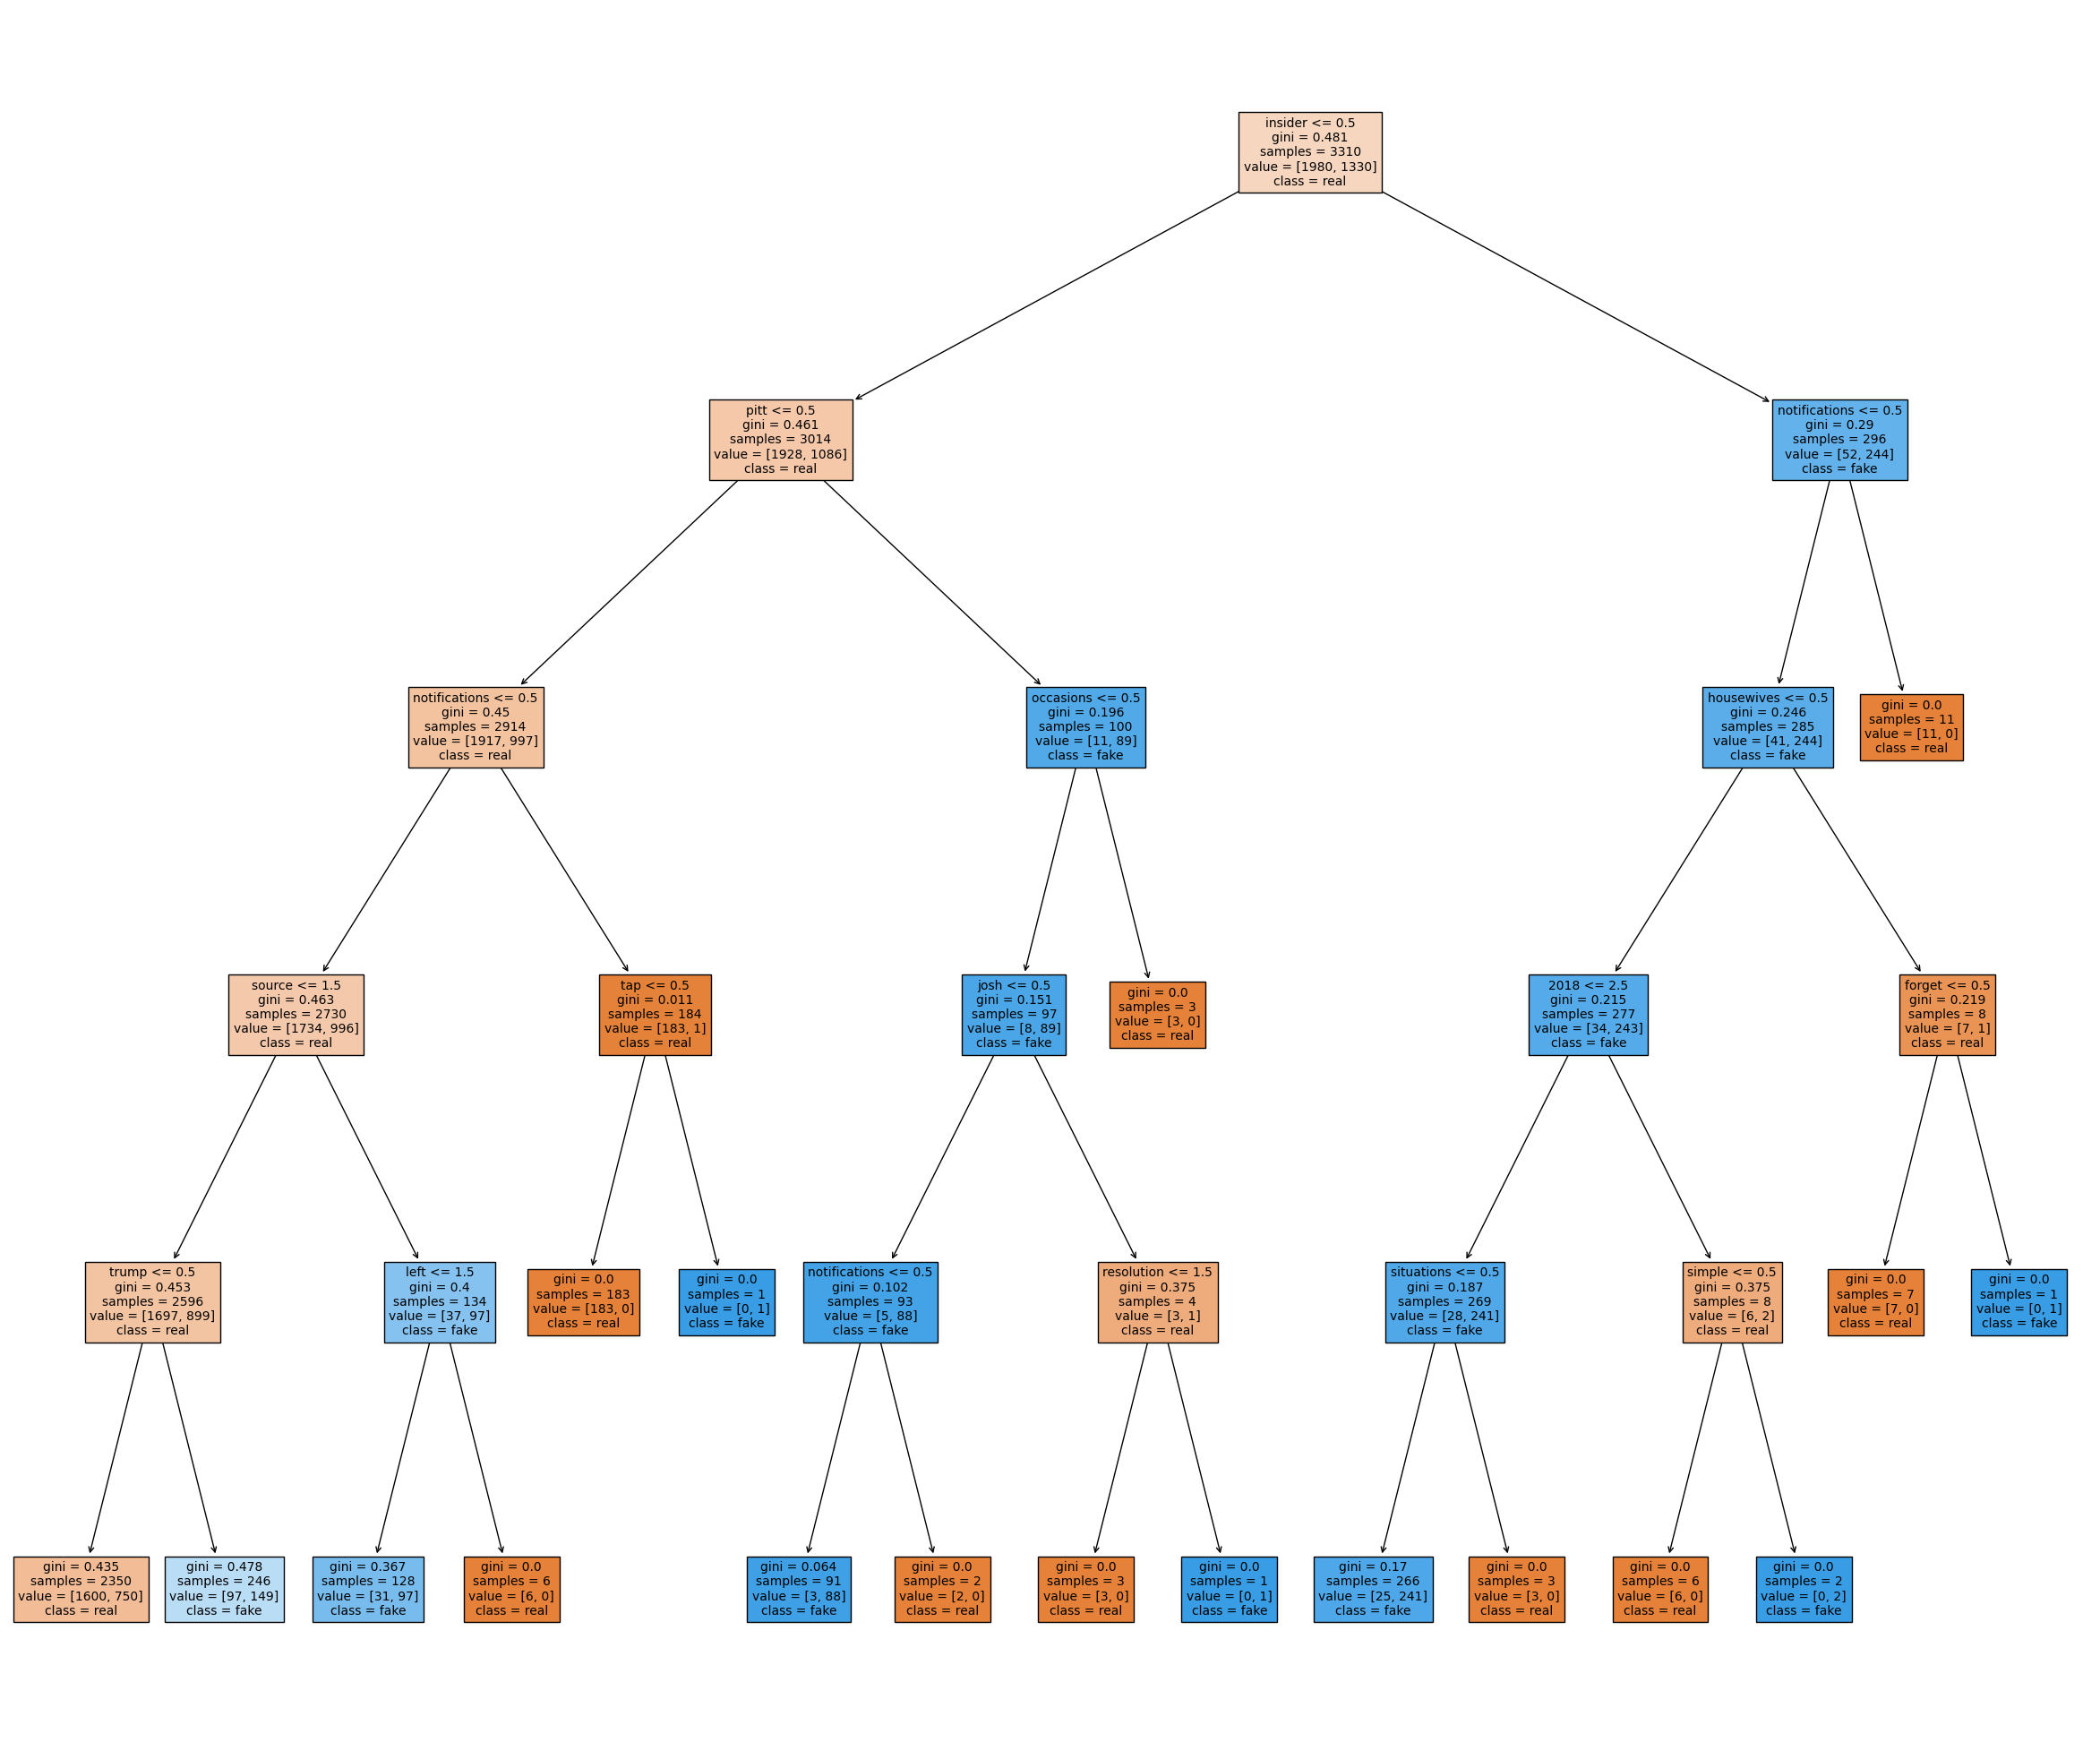

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (30,25))
_ = tree.plot_tree(dt,
                   feature_names=vectorizer.get_feature_names_out(),
                   class_names=['real', 'fake'],
                   filled=True)

In [39]:
def train_model(train_data, labels, vectorizer, model):
    """
    train_data: training data (pandas.DataFrame)
    labels: labels of train_data
    vectorizer: vectorizer to convert strings into numbers
    model: machine learning model from sklearn
    """

    X = vectorizer.fit_transform(train_data)

    model.fit(X, labels)
    
    return model, vectorizer

def predict(test_data, y_true, vectorizer, model):
    """
    test_data: data not used in training (pandas.DataFrame)
    y_true: Labels (Ground truth) of test_data
    vectorizer: vectorizer to convert strings into numbers
    model: machine learning model from sklearn
    """

    Y = vectorizer.transform(test_data)
    
    y_pred = model.predict(Y)
    
    acc = accuracy_score(y_true = y_true, y_pred = y_pred)

    report = classification_report(y_true=y_true, y_pred=y_pred)
    
    return acc, report

print(f"Accuracy: {acc}")
print(report)

Accuracy: 0.718816067653277
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       889
           1       0.72      0.40      0.52       530

    accuracy                           0.72      1419
   macro avg       0.72      0.65      0.66      1419
weighted avg       0.72      0.72      0.69      1419



In [40]:
# 2. RanfomForest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2021)
vectorizer = CountVectorizer()

rf_model, vectorizer = train_model(X_train, y_train, vectorizer, rf)

acc, report = predict(X_test, y_test, vectorizer, rf_model)

print(report)
print(acc)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       889
           1       0.78      0.50      0.61       530

    accuracy                           0.76      1419
   macro avg       0.77      0.71      0.72      1419
weighted avg       0.77      0.76      0.75      1419

0.7618040873854828


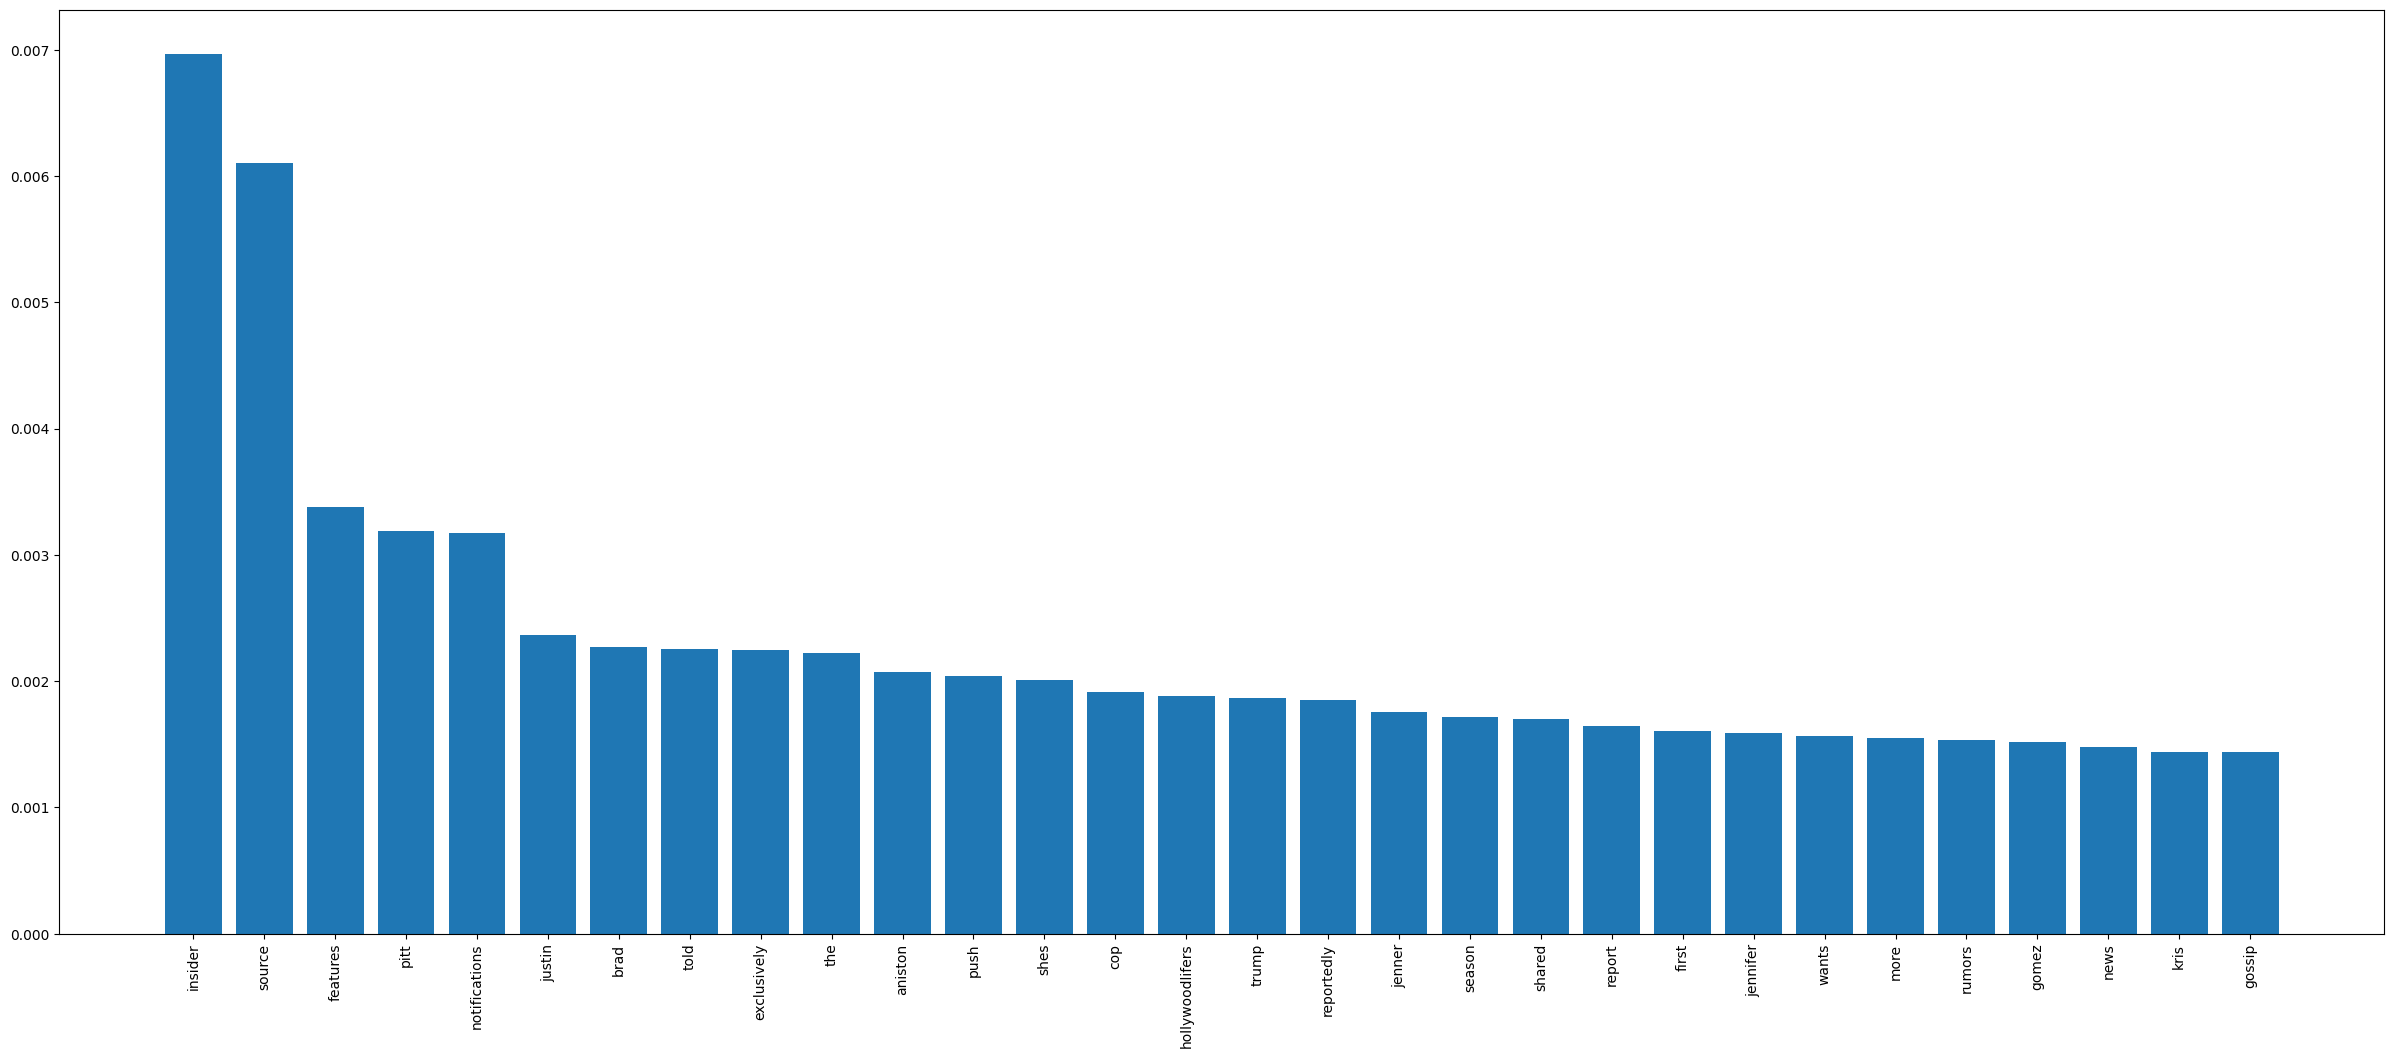

In [41]:
get_importances = []
for feature, importance in zip(vectorizer.get_feature_names_out(), rf_model.feature_importances_):
    get_importances.append((feature, importance))
get_importances.sort(key=lambda x: x[1],reverse=True)
# find out what the model uses to predict
plt.figure(figsize = (30,12))
plt.bar([i[0] for i in get_importances[:30]],height=[i[1] for i in get_importances[:30]])
plt.xticks(size=10,rotation=90)
plt.show()

In [42]:
# feature engineering

#stemming

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

def lemmatizer(clean_data):
    # Create a stemmer object
    lemmatizer = WordNetLemmatizer()
    stemmed_data = [] # List for storing the stemmed data
    for data in clean_data:
        stemmed_text = [lemmatizer.lemmatize(word) for word in data] # Stem the words
        stemmed_data.append(stemmed_text) # Append the stemmed text
    return stemmed_data

In [44]:
clean_data = clean_func(token_samples)
print('Before')
print("\n")
print(clean_data[0])

Before


['get', 'latest', 'today', 'sign', 'newsletter', 'no', 'one', 'ever', 'truly', 'gets', 'losing', 'loved', 'one', 'blake', 'shelton', 'exception', 'he', '14', 'older', 'brother', 'richie', 'died', 'nov', '13', '1990', 'and', 'shelton', 'noted', 'tweet', 'monday', 'it', 'changed', 'life', 'forever', 'richie', '24', 'died', 'car', 'accident', 'sheltons', 'home', 'state', 'oklahoma', 'two', 'years', 'ago', 'shelton', 'sent', 'message', '25th', 'anniversary', 'loss', 'richie', 'blakes', 'halfbrother', 'they', 'shared', 'mother', 'passenger', 'car', 'collided', 'school', 'bus', 'ada', 'south', 'oklahoma', 'city', 'richie', 'driver', 'redena', 'mcmanus', '3yearold', 'boy', 'christopher', 'mcmanus', 'died', 'shortly', 'collision', 'bus', 'driver', 'passengers', 'uninjured', 'according', 'police', 'reports', 'the', 'accident', 'clearly', 'remained', 'blake', 'told', '60', 'minutes', '2014', 'i', 'remember', 'picking', 'phone', 'call', 'week', 'dead', 'tell', 'something', 'i', 'picking'

In [45]:
print("After")
print("\n")
print(lemmatizer(clean_data)[0])

After


['get', 'latest', 'today', 'sign', 'newsletter', 'no', 'one', 'ever', 'truly', 'get', 'losing', 'loved', 'one', 'blake', 'shelton', 'exception', 'he', '14', 'older', 'brother', 'richie', 'died', 'nov', '13', '1990', 'and', 'shelton', 'noted', 'tweet', 'monday', 'it', 'changed', 'life', 'forever', 'richie', '24', 'died', 'car', 'accident', 'sheltons', 'home', 'state', 'oklahoma', 'two', 'year', 'ago', 'shelton', 'sent', 'message', '25th', 'anniversary', 'loss', 'richie', 'blake', 'halfbrother', 'they', 'shared', 'mother', 'passenger', 'car', 'collided', 'school', 'bus', 'ada', 'south', 'oklahoma', 'city', 'richie', 'driver', 'redena', 'mcmanus', '3yearold', 'boy', 'christopher', 'mcmanus', 'died', 'shortly', 'collision', 'bus', 'driver', 'passenger', 'uninjured', 'according', 'police', 'report', 'the', 'accident', 'clearly', 'remained', 'blake', 'told', '60', 'minute', '2014', 'i', 'remember', 'picking', 'phone', 'call', 'week', 'dead', 'tell', 'something', 'i', 'picking', 'phon

In [46]:
def preprocess_data_v2(data):
    tokenised_data = tokenizer(data)
    clean_token_data = clean_func(tokenised_data)
    stemmed_data = lemmatizer(clean_token_data)
    
    clean_data = [" ".join(tokens) for tokens in stemmed_data]
    return clean_data

In [47]:
# 3. tfidf

from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# Preprocess data
preprocessed_data = preprocess_data_v2(data_train)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, data_train["label"], test_size=0.3, random_state = 42)

# Initialize machine learning model and vectorizer
rf = RandomForestClassifier(random_state=2500)
vectorizer = TfidfVectorizer()

# Train model
rf_model, vectorizer = train_model(X_train, y_train, vectorizer, rf)
acc, report = predict(X_test, y_test, vectorizer, rf_model)

print(acc)
print(report)

0.7646229739252995
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       889
           1       0.78      0.51      0.62       530

    accuracy                           0.76      1419
   macro avg       0.77      0.71      0.72      1419
weighted avg       0.77      0.76      0.75      1419



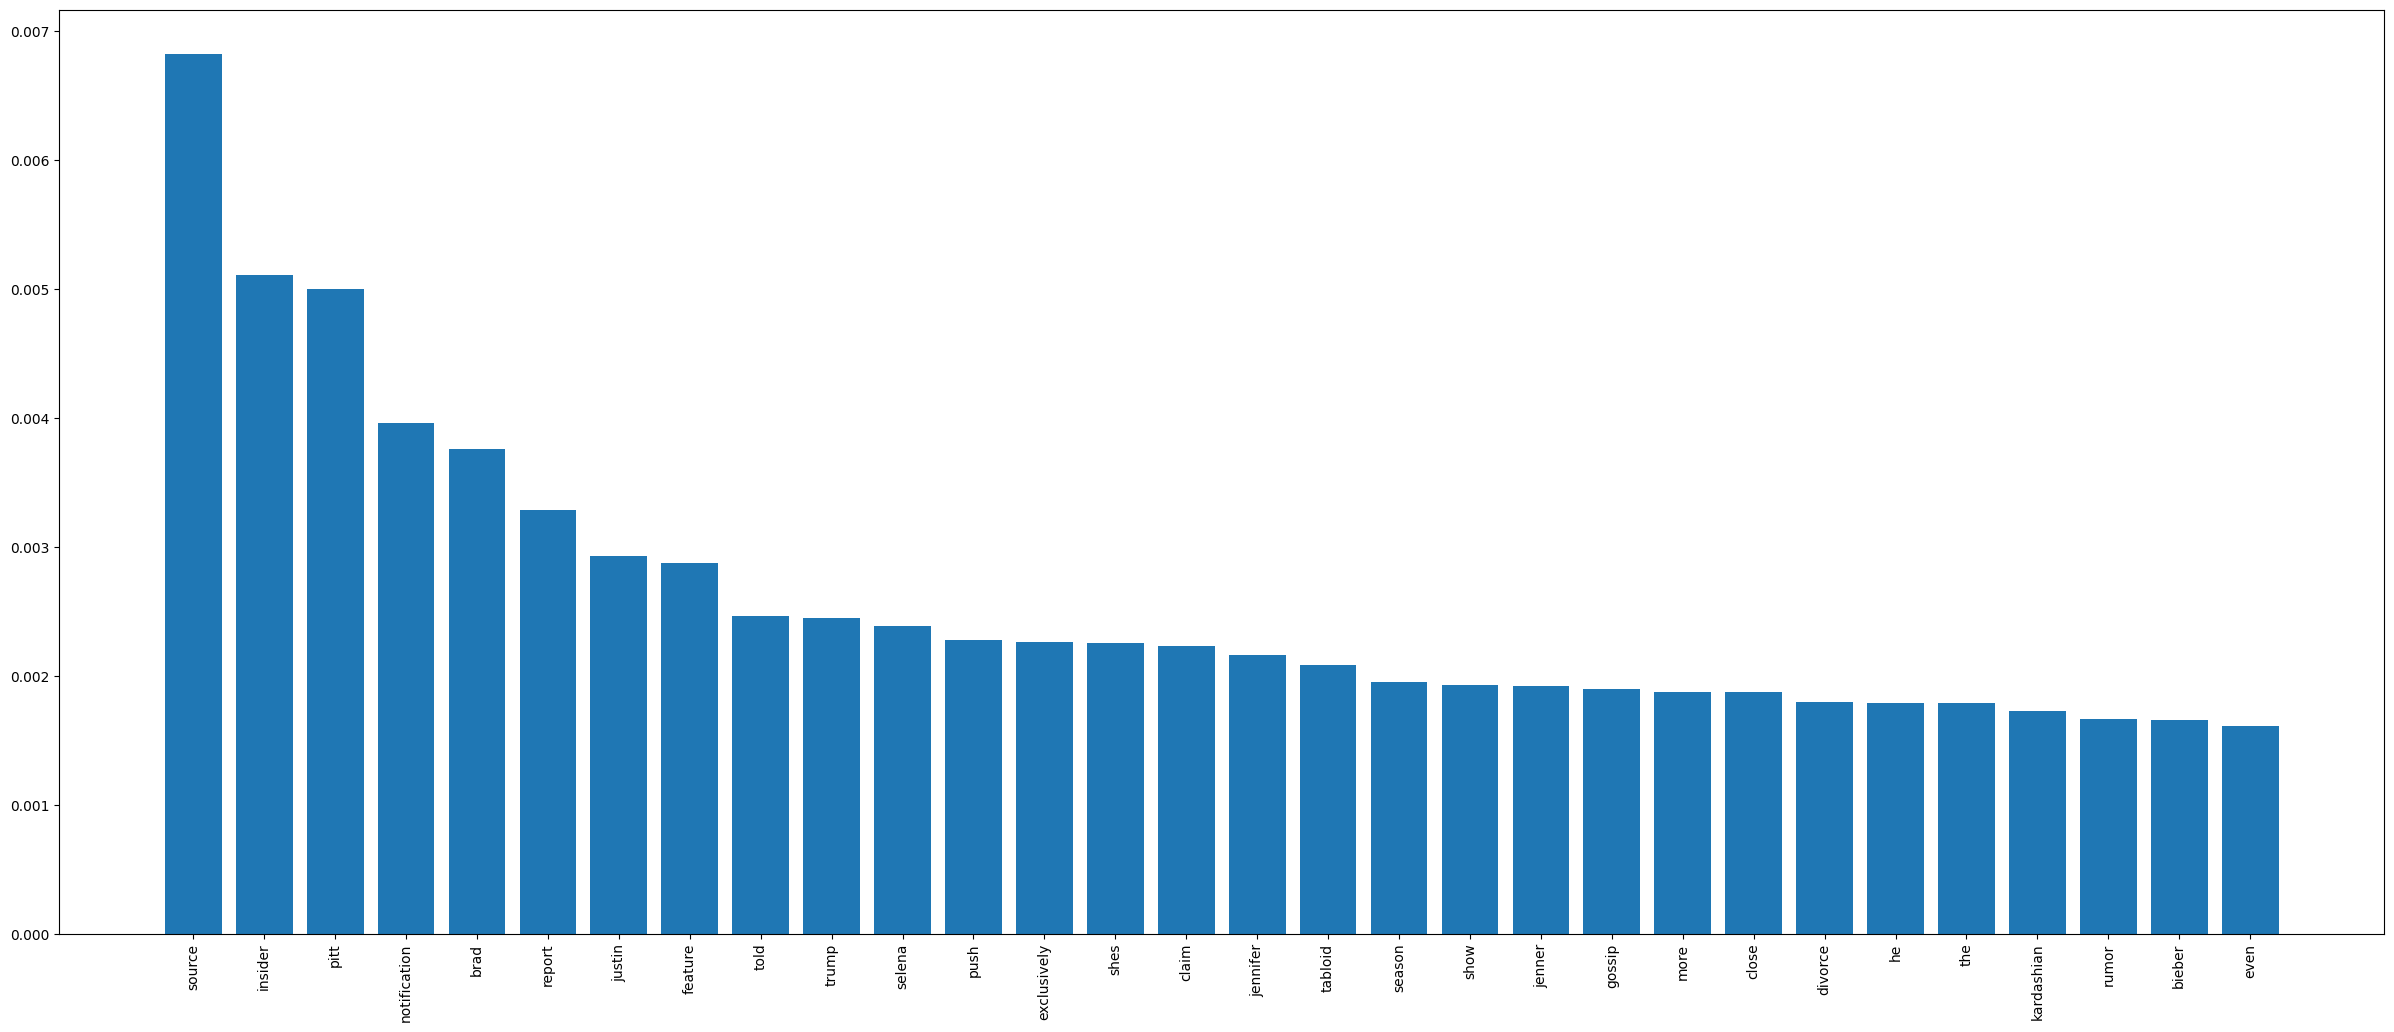

In [49]:
get_importances = []
for feature, importance in zip(vectorizer.get_feature_names_out(), rf_model.feature_importances_):
    get_importances.append((feature, importance))
get_importances.sort(key=lambda x: x[1],reverse=True)
# find out what the model uses to predict
plt.figure(figsize = (30,12))
plt.bar([i[0] for i in get_importances[:30]],height=[i[1] for i in get_importances[:30]])
plt.xticks(size=10,rotation=90)
plt.show()

In [50]:
import pickle 

with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
    
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Loading model and vectorizer
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
with open('vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

# Testing  loaded model and vectorizer
acc, report = predict(X_test, y_test, loaded_vectorizer, loaded_model)

print(acc)
print(report)

0.7646229739252995
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       889
           1       0.78      0.51      0.62       530

    accuracy                           0.76      1419
   macro avg       0.77      0.71      0.72      1419
weighted avg       0.77      0.76      0.75      1419



In [51]:
# 4. word2vec

!python -m spacy download en_core_web_sm

!python3 -m spacy download en_core_web_sm

/usr/bin/python: No module named spacy
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [52]:
import spacy

nlp = spacy.load("en_core_web_sm", disable = ['tagger', 'attribute_ruler', 'lemmatizer', 'parser'])
nlp.disable_pipe("parser")
nlp.enable_pipe("senter")

man_token = nlp("man")
man_token.vector

array([-1.591931  , -0.94253826, -1.1879255 ,  0.02135412, -0.01987019,
       -0.5515163 ,  1.2988886 ,  1.9334376 , -0.19777116, -0.18650642,
        0.98127645, -0.5940999 , -0.55147415,  0.37414187, -0.41936642,
        0.8951383 , -0.8177515 , -0.75340295,  1.1211922 ,  0.43900844,
        0.11160445,  0.5427562 ,  0.3093158 , -1.1731045 ,  0.54105175,
        0.12189752, -0.626732  ,  0.6258553 , -0.3000778 , -0.48692736,
       -0.3090623 ,  0.3349279 ,  0.8875127 ,  0.09445895, -1.1976581 ,
       -0.81541306, -0.17465746,  0.65861344,  1.1913543 , -0.09683126,
       -0.36143032,  0.06481624, -0.7301421 ,  0.22984016, -0.657959  ,
       -0.5268369 , -0.4421823 ,  1.0102589 , -0.22874326, -0.08885598,
        0.14012966,  0.9756067 ,  0.21550414, -0.09083623,  0.6243534 ,
        0.21680272,  1.2856668 , -0.19647253,  0.3818575 , -0.49428254,
       -0.48224986, -0.6418333 ,  0.7265097 , -0.37113708,  0.6900498 ,
        0.9826977 , -0.8453658 , -0.10065946,  0.7013573 , -0.19

In [53]:
from tqdm.notebook import tqdm

x = []
for sent in tqdm(data_train['text']):
    sent_vector = nlp(sent).vector
    x.append(sent_vector)

  0%|          | 0/4729 [00:00<?, ?it/s]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, data_train["label"], test_size=0.3, random_state = 42)

# Initialize machine learning model and vectorizer
rf = RandomForestClassifier(random_state=2021)

# Train model
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [55]:
acc = accuracy_score(y_true = y_test, y_pred = y_pred)

In [56]:
print(classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       889
           1       0.62      0.37      0.47       530

    accuracy                           0.68      1419
   macro avg       0.66      0.62      0.62      1419
weighted avg       0.67      0.68      0.66      1419



In [57]:
acc

0.6807610993657506

In [58]:
# 5. sentiment analysis

!pip install vadarSentiment

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement vadarSentiment (from versions: none)
ERROR: No matching distribution found for vadarSentiment


In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [60]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [61]:
for i in range(5):
    data_point = data_train.iloc[i]
    print(sentiment_analyzer.polarity_scores(data_point['text']))
    print(data_point["label"])

{'neg': 0.106, 'neu': 0.797, 'pos': 0.097, 'compound': -0.5302}
1
{'neg': 0.161, 'neu': 0.839, 'pos': 0.0, 'compound': -0.3612}
1
{'neg': 0.031, 'neu': 0.859, 'pos': 0.11, 'compound': 0.9857}
0
{'neg': 0.036, 'neu': 0.858, 'pos': 0.106, 'compound': 0.9994}
0
{'neg': 0.095, 'neu': 0.775, 'pos': 0.129, 'compound': 0.697}
0


In [62]:
news_sentiments = []
for i in range(data_train.shape[0]):
    data_point = data_train.iloc[i]
    sentiment_scores = sentiment_analyzer.polarity_scores(data_point['text'])
    news_sentiments.append(sentiment_scores)

In [63]:
data_train['compound'] = [sentiment['compound'] for sentiment in news_sentiments]

In [64]:
data_train.head(10)

,text,label,compound
0,Get the latest from TODAY Sign up for our news...,1,-0.5302
1,2d Conan On The Funeral Trump Will Be Invited...,1,-0.3612
2,It’s safe to say that Instagram Stories has fa...,0,0.9857
3,Much like a certain Amazon goddess with a lass...,0,0.9994
4,At a time when the perfect outfit is just one ...,0,0.6970
5,"When Reese Witherspoon was 17, she had already...",0,0.9999
6,It’s official! WAGS Miami stars Ashley Nicole ...,0,0.9694
7,"On March 24, 2018, one month and ten days afte...",1,0.9911
8,A mosque in Georgia is under fire after they s...,1,-0.9486
9,Scott Disick is sticking up for Khloe Kardashi...,1,0.8521


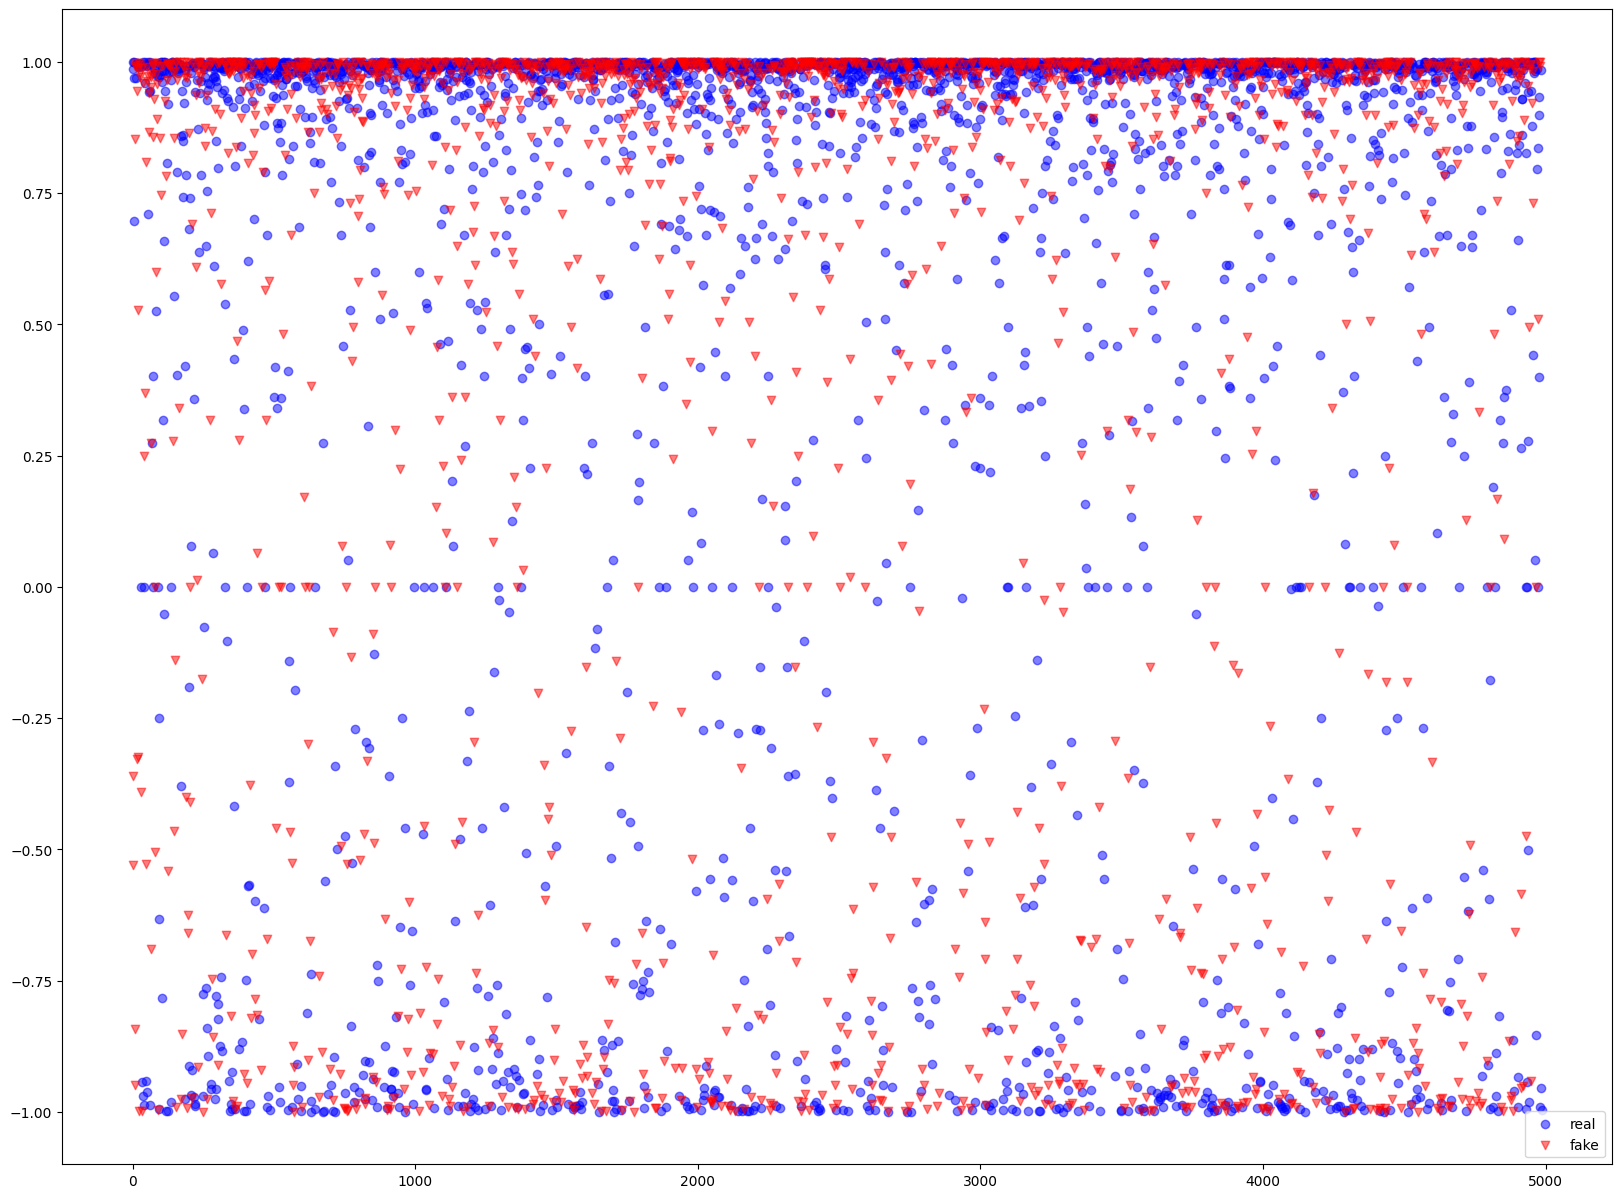

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.scatter(data_train[data_train.label == 0].index, data_train[data_train.label ==0].compound, color='blue', label='real', alpha=0.5)
plt.scatter(data_train[data_train.label == 1].index, data_train[data_train.label ==1].compound, marker='v', color='red', label='fake', alpha=0.5)
plt.legend()
plt.xticks(size=10)
plt.show()

In [66]:
plt.close()

In [67]:
import seaborn as sns

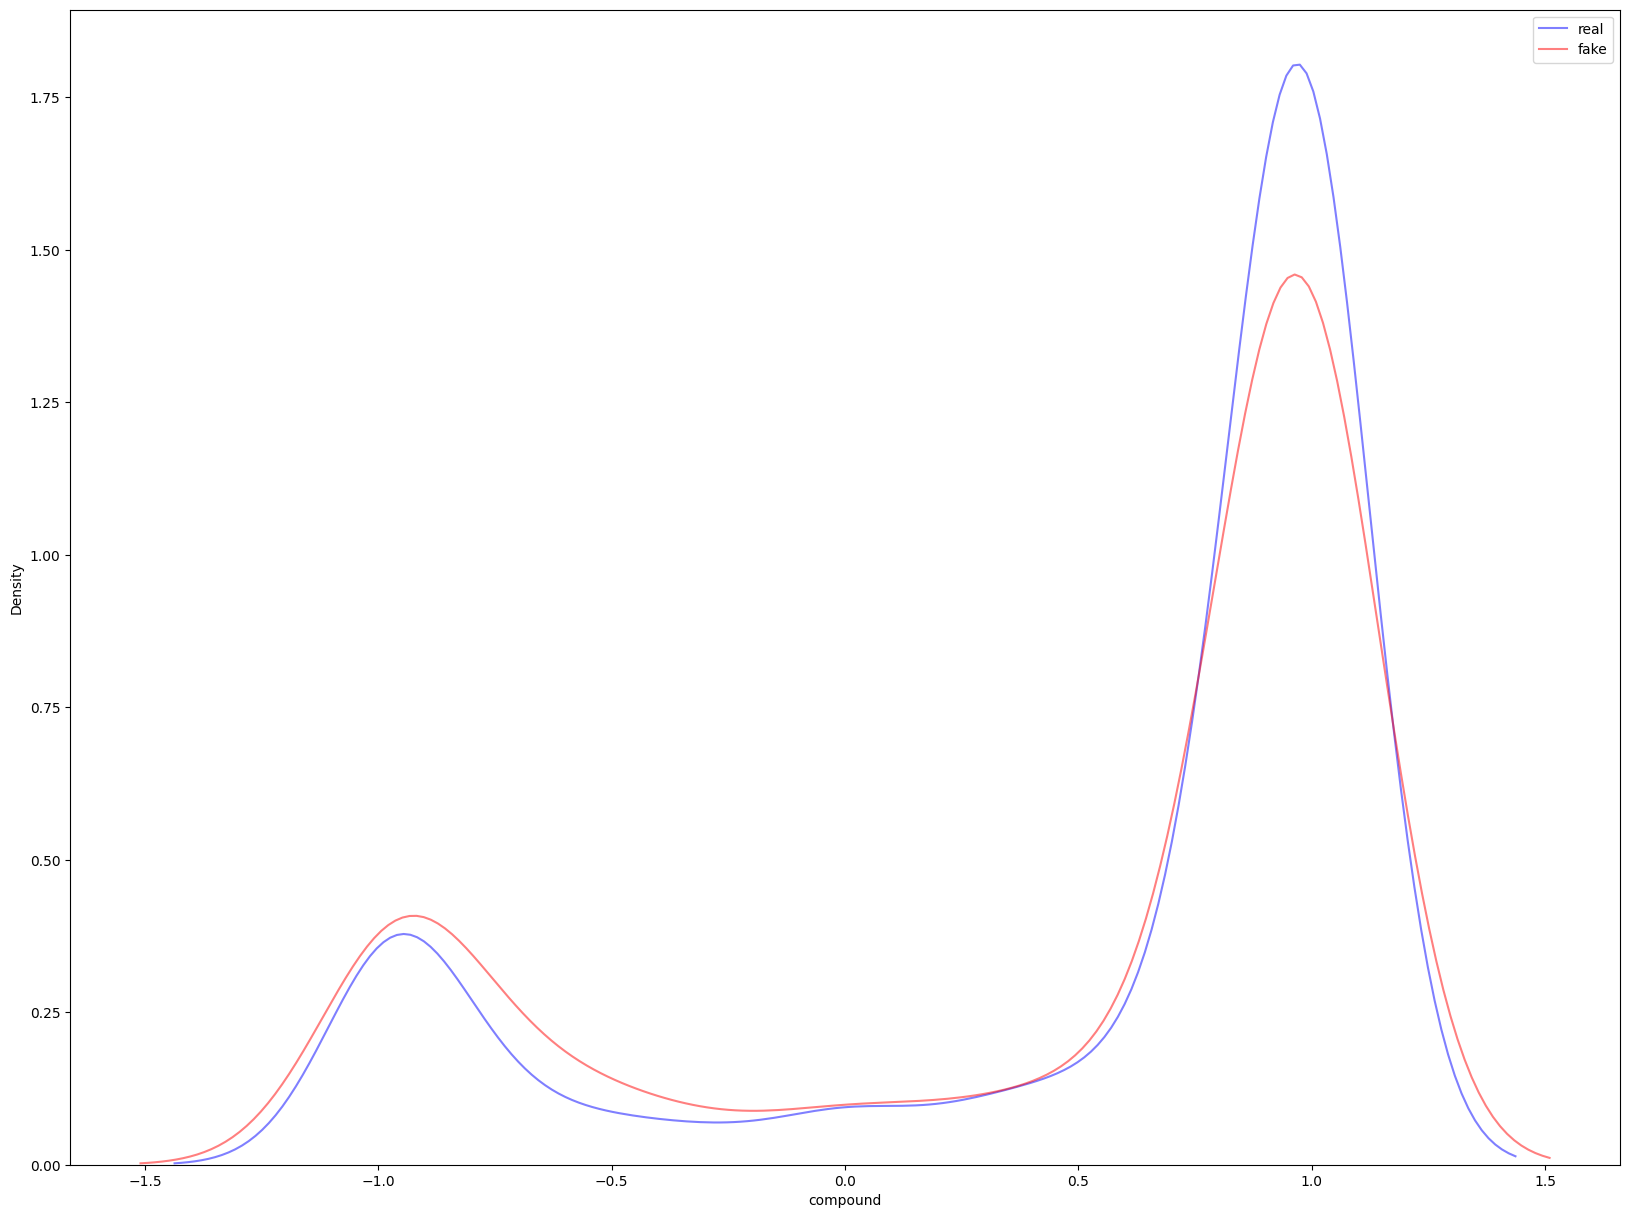

In [69]:
plt.figure(figsize=(20,15))
sns.kdeplot(data_train[data_train.label ==0].compound, color='blue', label='real', alpha=0.5)
sns.kdeplot(data_train[data_train.label ==1].compound, color='red', label='fake', alpha=0.5)
plt.legend()